In [1]:
#Importing required modules
import pandas as pd
import numpy as np 
import nltk

In [2]:
#creating a pandas dataframe with the CSV file provided
df = pd.read_csv(r"C:\Users\elizabeth\Documents\Luca's scraping\education_tweets_12082020.csv")

In [ ]:
df.head()

In [3]:
print(len(df))

132851


In [4]:
column_names = list(df.columns)
column_names

['Unnamed: 0',
 'user_id',
 'name',
 'screen_name',
 'location',
 'user_description',
 'user_friends_n',
 'user_followers_n',
 'listed_count',
 'prof_created_at',
 'favourites_count',
 'verified',
 'statuses_count',
 'contributors_enabled',
 'tweet_created_at',
 'tweet_id',
 'text',
 'truncated',
 'display_text_range',
 'source',
 'source_url',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'is_quote_status',
 'retweet_count',
 'favourite_count',
 'hashtags',
 'mentions',
 'source_device',
 'retweeted',
 'retweet_text',
 'quote_text',
 'quote_screen_name']

In [5]:
#preprocessing - first glanses at the data 
column_names = list(df.columns)
unique_values = list()
for col in df:
    unique_values.append(df[col].unique())
number_unique_values = list()
for col in df:
    number_unique_values.append(len(df[col].unique()))

In [6]:
#a summary table fo unique information 
summary_table = pd.DataFrame(column_names)
summary_table.columns=['column names']
summary_table['unique values'] = unique_values
summary_table['number of unique values'] = number_unique_values
summary_table

column names  \
0                Unnamed: 0   
1                   user_id   
2                      name   
3               screen_name   
4                  location   
5          user_description   
6            user_friends_n   
7          user_followers_n   
8              listed_count   
9           prof_created_at   
10         favourites_count   
11                 verified   
12           statuses_count   
13     contributors_enabled   
14         tweet_created_at   
15                 tweet_id   
16                     text   
17                truncated   
18       display_text_range   
19                   source   
20               source_url   
21    in_reply_to_status_id   
22      in_reply_to_user_id   
23  in_reply_to_screen_name   
24          is_quote_status   
25            retweet_count   
26          favourite_count   
27                 hashtags   
28                 mentions   
29            source_device   
30                retweeted   
31             retweet_text   
32               quote_text   
33        quote_screen_name   

                                        unique values  number of unique values  
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...                     3245  
1   [314483971, 13265, 46346940, 360667680, 391350...                       48  
2   [Alice Woolley, Richard Adams, Sarah Jewell, C...                       48  
3   [alicewoolley1, RichardA, sarahjewell21, camil...                       48  
4   [London, Surrey, Oxon, Arizona, United Kingdom...                       17  
5   [Journalist. Editor of Education Guardian. Eur...                       48  
6   [977, 2570, 654, 2262, 4557, 1344, 1445, 1687,...                       48  
7   [20734, 18270, 353, 3662, 5143, 7730, 6775, 26...                       50  
8   [545, 647, 17, 82, 101, 171, 266, 454, 657, 38...                       46  
9   [2011-06-10 10:12:52, 2006-11-20 15:41:59, 200...                       48  
10  [25943, 9657, 14, 28, 4193, 4834, 777, 21893, ...                       47  
11                                      [True, False]                        2  
12  [33710, 31072, 1597, 2969, 4711, 3858, 6095, 2...                       48  
13                                            [False]                        1  
14  [2020-08-12 13:26:40, 2020-08-12 12:15:45, 202...                   132494  
15  [1293539399200899079, 1293521553435635712, 129...                   132851  
16  [Poor @MichaelRosenYes and @Underthecranes - t...                   131826  
17                                            [False]                        1  
18  [[0, 176], [115, 223], [0, 105], [0, 140], [0,...                    10011  
19  [Twitter for iPad, Twitter Web App, Twitter fo...                       50  
20  [http://twitter.com/#!/download/ipad, https://...                       46  
21  [nan, 1.2932922656250716e+18, 1.29319257141024...                    33478  
22  [nan, 1.112439901570646e+18, 56432029.0, 14138...                    11580  
23  [nan, ScienceTeach24, nicolawoolcock, mikercam...                    11585  
24                                      [False, True]                        2  
25  [1, 0, 301, 19, 79342, 146, 89, 36437, 39, 506...                     3237  
26  [2, 4, 0, 1, 7, 3, 6, 8, 10, 9, 11, 5, 57, 178...                      420  
27  [[], [{'text': 'TomorrowsPapersToday', 'indice...                    17989  
28  [[{'screen_name': 'MichaelRosenYes', 'name': '...                    59374  
29  [Twitter for iPad, Twitter Web App, Twitter fo...                       50  
30                                            [False]                        1  
31  [None, Some urgent things for @educationgovuk ...                    40619  
32                                             [None]                        1  
33                                             [None]                        1

In [7]:
import re

In [8]:
print(df['tweet_created_at'][0])

2020-08-12 13:26:40


In [9]:
#I want to split the date so we can .groupby() 

df1 = df['tweet_created_at'].str.split(expand=True)
df1.columns = ['date', 'time']
df_date = df1['date'].str.split('-', expand=True)
df_date.columns = ['year', 'month', 'date']
df_time = df1['time'].str.split(':', expand=True)
df_time.columns = ['hour', 'minute', 'second']
df_date_time = pd.concat((df_date, df_time), axis=1)
df_date_time.head()
df = pd.concat((df, df_date_time), axis=1)

In [10]:
print(df['text'][0:3])

0    Poor @MichaelRosenYes and @Underthecranes - th...
1    @ScienceTeach24 @ChemMcDougall @hgeorgyy @drcs...
2    Ministers bid to quell revolt over England A-l...
Name: text, dtype: object


In [11]:
df['date1'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')
mask = (df['date1'] > '2020-05-01') & (df['date'] <= '2020-08-01')
df.loc[mask]
df = df.loc[mask]
len(df)

13069

In [12]:
def find_callouts(text):
    list_callouts = []
    for i in range(0,text.shape[0]):
        callout_temp = re.findall(r'\@\w+',text.iloc[i])
        list_callouts.append(callout_temp)
    return list_callouts
callouts = find_callouts(df['text'])
df['callouts'] = callouts

In [13]:
def find_hashtags(text):
    list_hashtags = []
    for i in range(0,text.shape[0]):
        hashtag_temp = re.findall(r'\#(\w+)',text.iloc[i])
        list_hashtags.append(hashtag_temp)
    return list_hashtags
df['hashtag1'] = find_hashtags(df['text'])

In [14]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

4345

In [15]:
df['hashtag1'][53:56]

53              []
54              []
55    [oscarwilde]
Name: hashtag1, dtype: object

In [16]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
df['clean_tweet'] = df['text'].apply(lambda x: clean_text(x))

In [17]:
df['clean_tweet'][0]

'Poor  and  - they really need a holiday.\nFury at  and Hoseasons over cancelled and double bookings '

In [18]:
pip install gensim==3.8.3

# LDA

In [19]:
import gensim

In [20]:
# import packages for stopword removal 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.util import ngrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elizabeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elizabeth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
#adding 'RT' (retweet) to list of words to remove  
stop_words_nltk = stopwords.words('english')
stop_words_nltk.extend(['rt', 'u', 'r', 'ur'])
print(stop_words)

NameError: name 'stop_words' is not defined

In [22]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

Requirement already up-to-date: spacy in c:\users\elizabeth\anaconda3\lib\site-packages (2.3.2)
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [23]:
import spacy

# loading english language model of spaCy
en_model = spacy.load('en_core_web_sm')

# gettign the list of default stop words in spaCy english model
stop_words = en_model.Defaults.stop_words
stop_words = list(stop_words)
stop_words.extend(stop_words_nltk)

In [24]:
#this is slow -compared to the tokenization in sklearn
def normalized_df_text(text): #normalizing, stop word removal, & lementizing
    normalized =[]
    for i in range(0,text.shape[0]):
        norm_temp = re.findall(r'[A-Za-z]+',text.iloc[i]) #taking all words (leaving punctuation out)
        norm_temp = [w.lower() for w in norm_temp] # putting words in lower case
        norm_temp = [w for w in norm_temp if not w in stop_words] # removing stopwords
        lemma = WordNetLemmatizer()
        norm_temp = [lemma.lemmatize(w, pos = "v") for w in norm_temp] #lemmatizing verbs
        norm_temp = [lemma.lemmatize(w, pos = "n") for w in norm_temp] #lemmatizing nouns
        norm_temp = [' '.join(norm_temp)] 
        normalized.append(norm_temp)
    return normalized

normalized = normalized_df_text(df['clean_tweet'])
df['normalized_tweet'] = normalized

In [25]:
#tokenising for df
def tokenized_df_text(text):
    normalized_tweets = []
    for i in range(len(text)):
        normalized_tweets.append(nltk.word_tokenize(text.iloc[i][0]))
    return normalized_tweets
    
df['tokenized_tweet'] = tokenized_df_text(df['normalized_tweet'])


# merging everytweet into one corpus for ngrams

In [26]:
#turning clean_tweets into a corpus
clean_tweet_corpus = df['clean_tweet'].str.cat(sep=' ')

In [27]:
#this is slow -compared to the tokenization in sklearn
def normalized_corpus_text(text): #normalizing, stop word removal, & lementizing
    norm_temp = re.findall(r'[A-Za-z]+',text) #taking all words (leaving punctuation out)
    norm_temp = [w.lower() for w in norm_temp] # putting words in lower case
    norm_temp = [w for w in norm_temp if not w in stop_words] # removing stopwords
    lemma = WordNetLemmatizer()
    norm_temp = [lemma.lemmatize(w, pos = "v") for w in norm_temp] #lemmatizing verbs
    norm_temp = [lemma.lemmatize(w, pos = "n") for w in norm_temp] #lemmatizing nouns
    norm_temp = [' '.join(norm_temp)] 
    return norm_temp

In [28]:
normalized_corpus = normalized_corpus_text(clean_tweet_corpus)

In [29]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['tokenized_tweet'], min_count=1, threshold=2) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['tokenized_tweet']], threshold=1)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [30]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

df['bigrams'] = make_bigrams(df['tokenized_tweet'])
df['ngram'] = make_trigrams(df['bigrams'])
print(df['ngram'][0:10])

0    [poor, need_holiday, fury, hoseasons, cancel, ...
1    [oh_dear, think, time, bite, break, appreciate...
2    [minister, bid, quell, revolt, england, level,...
3    [urgent, thing, work, probably, matter, hour, ...
4    [england_wale, follow_scotland, exam_grade, tu...
5    [guardian, generation, risk_level, chaos, warn...
6    [know, senator, long_time, prepare, job, spend...
7                                    [yay, great_news]
8     [unite_kingdom, daily_coronavirus, covid_report]
9           [imagine, think_sort, reaction, good_idea]
Name: ngram, dtype: object


In [31]:
def tokenized_corpus_text(text):
    tokenized_corpus = nltk.word_tokenize(str(text))
    return tokenized_corpus

tokenized_corpus = tokenized_corpus_text(normalized_corpus)

In [32]:
# counting words

from collections import Counter
counts = Counter(tokenized_corpus)
sorted(counts.items(), key=lambda kv: kv[1], reverse=True)
df_word_counts = pd.DataFrame(counts.items())
df_word_counts.columns = ['word', 'frequency']
df_word_counts.sort_values(['frequency'], ascending=False, inplace=True)
df_word_counts.head(40)
len(df_word_counts)

12585

In [33]:
mask = (df_word_counts['frequency'] > 300)  
df_word_counts.loc[mask]
df_word_counts = df_word_counts.loc[mask]
freq_words = df_word_counts['word'].str.cat(sep=' ')
freq_words = freq_words.split()

# Wordclouds

In [34]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [35]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [36]:
def wordcloud_plot(text):
    wordcloud = WordCloud(collocations=False, 
                          width = 1000, 
                          height = 700, 
                          background_color ='white', 
                          min_font_size = 10).generate(text)
    
    plt.figure(figsize = (8,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

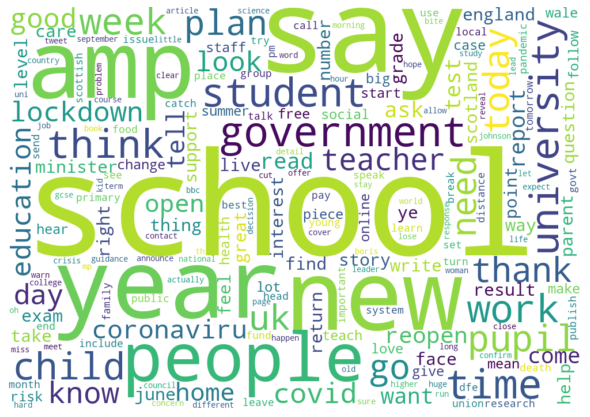

In [37]:
#tweet corpus wordcloud
text = str(normalized_corpus)
wordcloud_plot(text)

# Hashtags

In [38]:
#creating a dataframe with only the tweets with hashtags
df_hashtag = df[df['hashtag1'].apply(lambda x: len(x)) > 0]

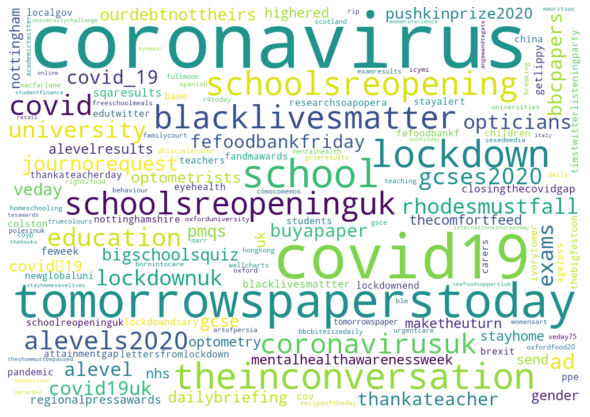

In [39]:
#hashtag wordcloud
hashtag_corpus = df_hashtag.hashtag1.sum()
hashtag_corpus = ' '.join(hashtag_corpus).lower()
wordcloud_plot(hashtag_corpus)

The idea of correlating the hastags came from https://github.com/enoreese

In [40]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in df_hashtag.hashtag1
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df.head()
len(flattened_hashtags_df)

1417

In [41]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

675

In [42]:
# count of appearances of each hashtag
num_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
num_hashtags.head(20)

hashtag  counts
0            coronavirus     109
1   TomorrowsPapersToday      50
2                COVID19      38
3               lockdown      34
4                schools      29
5       schoolsreopening      25
6     schoolsreopeninguk      23
7       BlackLivesMatter      21
8      THEinConversation      19
9          coronavirusuk      18
10               covid19      17
11           alevels2020      15
12             education      13
13               Covid19      13
14             gcses2020      11
15     THEinconversation      11
16        RhodesMustFall      10
17            lockdownuk      10
18                 covid      10
19                 exams      10

In [43]:
len(num_hashtags)

675

In [44]:
'''Find Correlated Hashtags
We will need to turn the text into numeric form. 
It is possible to do this by transforming from a list of hashtags 
to a vector representing which hashtags appeared in which rows.'''

# take hashtags which appear at least this amount of times
min_appearance = 5

# find popular hashtags - make into python set for efficiency
popular_hashtags = set(num_hashtags[
                           num_hashtags.counts>=min_appearance
                           ]['hashtag'])
len(popular_hashtags)


39

In [45]:
popular_hashtags

{'Alevel',
 'BBCPapers',
 'BlackLivesMatter',
 'COVID19',
 'COVIDー19',
 'Covid',
 'Covid19',
 'Covid19UK',
 'Covid_19',
 'DailyBriefing',
 'FEFoodbankFriday',
 'JournoRequest',
 'OurDebtNotTheirs',
 'RhodesMustFall',
 'THEinConversation',
 'THEinconversation',
 'ThankATeacher',
 'TomorrowsPapersToday',
 'University',
 'VEDay',
 'ad',
 'alevels2020',
 'buyapaper',
 'coronavirus',
 'coronavirusuk',
 'covid',
 'covid19',
 'education',
 'exams',
 'gcses2020',
 'lockdown',
 'lockdownuk',
 'opticians',
 'school',
 'schools',
 'schoolsreopening',
 'schoolsreopeninguk',
 'tomorrowspaperstoday',
 'university'}

In [46]:
'''Next we are going to create a new column in df_hashtag which filters 
the hashtags to only the popular hashtags. 
We will also drop the rows where no popular hashtags appear.'''

# make a new column with only the popular hashtags
df_hashtag['popular_hashtags'] =df_hashtag.hashtag1.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags])

# drop rows without popular hashtag
popular_hashtags_list_df = df_hashtag.loc[
            df_hashtag.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

len(popular_hashtags_list_df)

<ipython-input-46-b8c834c3fa36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hashtag['popular_hashtags'] =df_hashtag.hashtag1.apply(


463

In [47]:
'''Next we want to vectorise our the hashtags
To do this, we create a dataframe where the hashtags contained in each row are in vector form.'''

# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [48]:
# Drop popular_hashtags columns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

C:\Users\elizabeth\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\elizabeth\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


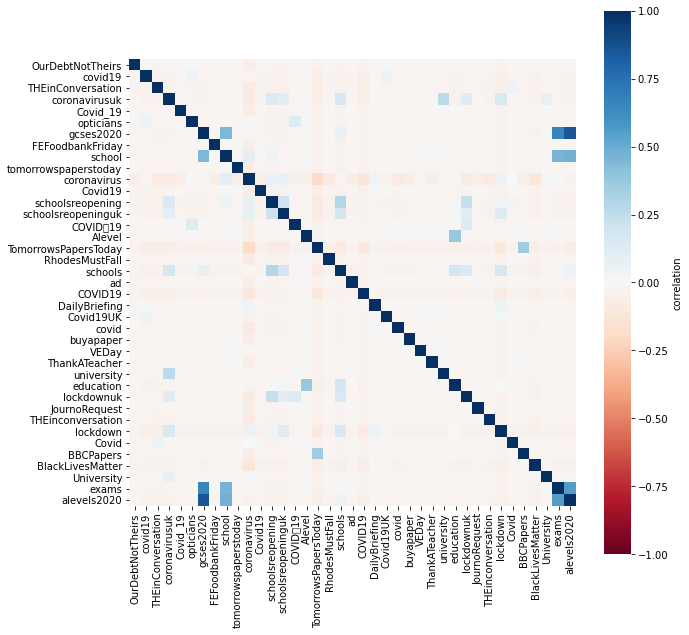

In [49]:
import seaborn as sns

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()



# combining hashtag infor with tweet 

In [50]:
df['tweet&hashtag'] = df['ngram']+ df['hashtag1']
df['tweet&hashtag'][53]

['man',
 'shoot',
 'postman',
 'face',
 'wear',
 'short',
 'right',
 'cyclist',
 'sex',
 'offender',
 'reg']

In [137]:
!pip install tensorflow-gpu
!pip install keras

  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)

ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.3.0 which is incompatible.



  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2


In [138]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\Users\elizabeth\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [135]:

import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


class Autoencoder:
    """
    Autoencoder for learning latent space representation
    architecture simplified for only one hidden layer
    """

    def __init__(self, latent_dim=32, activation='relu', epochs=200, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None

    def _compile(self, input_dim):
        """
        compile the computational graph
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)

    def fit(self, X):
        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X)
        self.his = self.autoencoder.fit(X_train, X_train,
                                        epochs=200,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(X_test, X_test), verbose=0)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

# LDA

In [51]:
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

#and this is from: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
id_map = Dictionary(df['tweet&hashtag'])

count = 0
for k, v in id_map.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
        
# creating a dictionary reporting how many words and how many times those words appear
bow_corpus = [id_map.doc2bow(doc) for doc in df['tweet&hashtag']]

# Preview Bag Of Words for our sample preprocessed document.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               id_map[bow_doc_0[i][0]], 
                                                     bow_doc_0[i][1]))


0 book
1 cancel
2 double
3 fury
4 hoseasons
5 need_holiday
6 poor
7 appreciate
8 bite
9 break
10 nice
Word 0 ("book") appears 1 time.
Word 1 ("cancel") appears 1 time.
Word 2 ("double") appears 1 time.
Word 3 ("fury") appears 1 time.
Word 4 ("hoseasons") appears 1 time.
Word 5 ("need_holiday") appears 1 time.
Word 6 ("poor") appears 1 time.


# LDA using TfidfModel

Tf-idf, or term frequency-inverse document frequency, assigns a weight for term j in document i 
Intuitively, a term has a large weight when it occurs frequently across the document but infrequently across the corpus.
The word “build” might appear often in a document, but because it’s likely fairly common in the rest of the corpus, it will not have a high tf-idf score. However, if the word “gentrification” appears often in a document, because it is rarer in the rest of the corpus, it will have a higher tf-idf score.

In [52]:
# Create tf-idf model object using models.TfidfModel on 'corpus’ and save it to ‘tfidf’, 
# TfidfModel is short for term frequency-inverse document frequency: a numeric stat reflecting how important a word is
# increases proportionally to the number of times a word appears in a doc.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)

# then apply transformation to the entire corpus and call it ‘corpus_tfidf’
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.26818364357111585),
 (1, 0.318162566554139),
 (2, 0.33100617675165384),
 (3, 0.417414340142929),
 (4, 0.47214108543575767),
 (5, 0.47214108543575767),
 (6, 0.31179461997762065)]


# Evaluation of LDA


In [53]:
# Evaluating the bag of words LDA model 
#Where woudl the text tweet [0] be classified?
# Notice this tweet has nothing to do with these words!
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


NameError: name 'lda_model' is not defined

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score 
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for bow_lda_model: ', coherence_lda)

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for tfidf_lda_model: ', coherence_lda)

# Hyperparameter tuning

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

Model hyperparameters can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K

Model parameters can be thought of as what the model learns during training, such as the weights for each word in a given topic

Now that we have the baseline coherence score for the default LDA model, let’s perform a series of sensitivity tests to help determine the following model hyperparameters:
1/ Number of Topics (K)
2/ Dirichlet hyperparameter alpha: Document-Topic Density
3/ Dirichlet hyperparameter beta: Word-Topic Density

We’ll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two different validation corpus sets. We’ll use C_v as our choice of metric for performance comparison

In [54]:
from gensim.models import CoherenceModel

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id_map,
                                           num_topics=k,
                                           alpha=a,
                                           eta=b,
                                           random_state=0,
                                           chunksize=20000,
                                           passes=20,
                                           workers=12,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
    
    return coherence_model_lda.get_coherence()



In [55]:
import tqdm

grid = {}
grid['Validation_Set'] = {}

num_of_docs = len(corpus_tfidf)
corpus = corpus_tfidf
#corpus = [gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5)]


# Topics range
min_topics = 5
max_topics = 105
step_size = 10
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=224)
    
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # iterare through beta values
            for b in beta:
                # get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus, dictionary=id_map, k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                print(cv)    
                
                pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


  0%|▎                                                                              | 1/224 [02:29<9:14:43, 149.25s/it]

0.232234488428024


  1%|▋                                                                              | 2/224 [04:53<9:06:13, 147.63s/it]

0.23358006087749117


  1%|█                                                                              | 3/224 [07:20<9:03:36, 147.59s/it]

0.2638592396073925


  2%|█▍                                                                             | 4/224 [09:52<9:05:41, 148.83s/it]

0.2961535889687708


  2%|█▊                                                                             | 5/224 [12:15<8:57:10, 147.17s/it]

0.23865236300583065


  3%|██                                                                             | 6/224 [15:09<9:23:43, 155.15s/it]

0.3542206504506492


  3%|██▍                                                                           | 7/224 [18:28<10:08:49, 168.34s/it]

0.3292179300025247


  4%|██▊                                                                           | 8/224 [22:10<11:03:47, 184.39s/it]

0.3366993065220748


  4%|███▏                                                                          | 9/224 [26:06<11:56:44, 200.02s/it]

0.3303165871392377


  4%|███▍                                                                         | 10/224 [29:15<11:41:01, 196.55s/it]

0.34041861242658134


  5%|███▊                                                                         | 11/224 [31:40<10:43:23, 181.24s/it]

0.34776108965560976


  5%|████▏                                                                        | 12/224 [34:32<10:29:59, 178.30s/it]

0.36496879834141577


  6%|████▍                                                                        | 13/224 [37:51<10:49:10, 184.60s/it]

0.36660375725040756


  6%|████▊                                                                        | 14/224 [41:16<11:07:04, 190.59s/it]

0.38245531482319167


  7%|█████▏                                                                       | 15/224 [43:51<10:27:26, 180.13s/it]

0.3510287643667277


  7%|█████▌                                                                        | 16/224 [46:06<9:37:29, 166.58s/it]

0.31420967067945366


  8%|█████▉                                                                        | 17/224 [48:44<9:26:03, 164.07s/it]

0.2532298992123067


  8%|██████▎                                                                       | 18/224 [51:19<9:13:50, 161.31s/it]

0.1532051145564893


  8%|██████▌                                                                       | 19/224 [53:54<9:04:00, 159.22s/it]

0.1944402964480951


  9%|██████▉                                                                       | 20/224 [56:20<8:48:32, 155.45s/it]

0.310688739585431


  9%|███████▎                                                                      | 21/224 [59:11<9:01:36, 160.08s/it]

0.30435279588276953


 10%|███████▍                                                                    | 22/224 [1:02:02<9:09:40, 163.27s/it]

0.2643091738087456


 10%|███████▊                                                                    | 23/224 [1:04:59<9:21:10, 167.51s/it]

0.2562969286906037


 11%|████████▏                                                                   | 24/224 [1:08:03<9:34:56, 172.48s/it]

0.29690038985960515


 11%|████████▍                                                                   | 25/224 [1:10:54<9:30:24, 171.98s/it]

0.28486549330957023


 12%|████████▊                                                                   | 26/224 [1:13:14<8:55:32, 162.28s/it]

0.5399697938323286


 12%|█████████▏                                                                  | 27/224 [1:15:25<8:22:32, 153.06s/it]

0.4705997965601612


 12%|█████████▌                                                                  | 28/224 [1:17:46<8:07:46, 149.32s/it]

0.4592266982278465


 13%|█████████▊                                                                  | 29/224 [1:20:12<8:01:44, 148.23s/it]

0.49948751213877196


 13%|██████████▏                                                                 | 30/224 [1:22:22<7:41:22, 142.69s/it]

0.5055245569439891


 14%|██████████▌                                                                 | 31/224 [1:24:51<7:45:31, 144.72s/it]

0.3850810852268904


 14%|██████████▊                                                                 | 32/224 [1:27:14<7:41:27, 144.21s/it]

0.3948702645689721


 15%|███████████▏                                                                | 33/224 [1:29:44<7:44:17, 145.85s/it]

0.457771490422534


 15%|███████████▌                                                                | 34/224 [1:32:16<7:47:43, 147.70s/it]

0.6632577886319687


 16%|███████████▉                                                                | 35/224 [1:34:42<7:44:09, 147.35s/it]

0.38251571305265597


 16%|████████████▏                                                               | 36/224 [1:37:21<7:52:43, 150.87s/it]

0.5094386656506156


 17%|████████████▌                                                               | 37/224 [1:40:24<8:19:49, 160.37s/it]

0.5248056026344424


 17%|████████████▉                                                               | 38/224 [1:44:03<9:12:08, 178.11s/it]

0.5159784853391829


 17%|█████████████                                                              | 39/224 [1:48:02<10:04:55, 196.19s/it]

0.6080361940537892


 18%|█████████████▌                                                              | 40/224 [1:50:43<9:29:35, 185.73s/it]

0.5345043141532037


 18%|█████████████▉                                                              | 41/224 [1:52:53<8:35:08, 168.90s/it]

0.5732735179105688


 19%|██████████████▎                                                             | 42/224 [1:55:18<8:10:59, 161.86s/it]

0.46620246137515153


 19%|██████████████▌                                                             | 43/224 [1:57:38<7:48:06, 155.17s/it]

0.18640631918292785


 20%|██████████████▉                                                             | 44/224 [1:59:56<7:30:04, 150.03s/it]

0.183838212426754


 20%|███████████████▎                                                            | 45/224 [2:02:06<7:09:47, 144.06s/it]

0.5943311904068318


 21%|███████████████▌                                                            | 46/224 [2:04:11<6:50:49, 138.48s/it]

0.6234159276164344


 21%|███████████████▉                                                            | 47/224 [2:06:22<6:41:52, 136.23s/it]

0.2020276802710649


 21%|████████████████▎                                                           | 48/224 [2:08:36<6:37:03, 135.36s/it]

0.17408967262588773


 22%|████████████████▋                                                           | 49/224 [2:10:47<6:31:31, 134.23s/it]

0.21502817765311572


 22%|████████████████▉                                                           | 50/224 [2:12:52<6:20:50, 131.32s/it]

0.6233628052568605


 23%|█████████████████▎                                                          | 51/224 [2:15:24<6:36:40, 137.57s/it]

0.4227625429782035


 23%|█████████████████▋                                                          | 52/224 [2:17:49<6:40:59, 139.88s/it]

0.38893996454420865


 24%|█████████████████▉                                                          | 53/224 [2:20:22<6:49:37, 143.73s/it]

0.4620339179303483


 24%|██████████████████▎                                                         | 54/224 [2:22:55<6:54:53, 146.43s/it]

0.6642827148169339


 25%|██████████████████▋                                                         | 55/224 [2:25:20<6:51:51, 146.22s/it]

0.401604777610115


 25%|███████████████████                                                         | 56/224 [2:27:51<6:53:18, 147.61s/it]

0.46810483352346904


 25%|███████████████████▎                                                        | 57/224 [2:30:15<6:47:43, 146.49s/it]

0.37239660289623455


 26%|███████████████████▋                                                        | 58/224 [2:32:35<6:40:14, 144.67s/it]

0.47996462214697844


 26%|████████████████████                                                        | 59/224 [2:34:53<6:32:20, 142.67s/it]

0.5249330665022037


 27%|████████████████████▎                                                       | 60/224 [2:37:20<6:33:22, 143.92s/it]

0.42841784073873357


 27%|████████████████████▋                                                       | 61/224 [2:39:54<6:39:08, 146.92s/it]

0.5508160998742379


 28%|█████████████████████                                                       | 62/224 [2:42:22<6:37:27, 147.21s/it]

0.4885890636002766


 28%|█████████████████████▍                                                      | 63/224 [2:45:03<6:45:57, 151.29s/it]

0.6389570336700359


 29%|█████████████████████▋                                                      | 64/224 [2:47:37<6:45:26, 152.04s/it]

0.4720264606183735


 29%|██████████████████████                                                      | 65/224 [2:50:06<6:40:58, 151.31s/it]

0.5352547407331887


 29%|██████████████████████▍                                                     | 66/224 [2:52:44<6:43:38, 153.28s/it]

0.5500443950482096


 30%|██████████████████████▋                                                     | 67/224 [2:57:26<8:22:08, 191.90s/it]

0.6373420702937718


 30%|██████████████████████▊                                                    | 68/224 [3:03:17<10:22:42, 239.50s/it]

0.5597215868066678


 31%|███████████████████████                                                    | 69/224 [3:08:14<11:03:36, 256.88s/it]

0.3536442592930981


 31%|███████████████████████▍                                                   | 70/224 [3:12:32<10:59:58, 257.13s/it]

0.5727546335604926


 32%|███████████████████████▊                                                   | 71/224 [3:15:40<10:02:30, 236.28s/it]

0.6055165222255233


 32%|████████████████████████▍                                                   | 72/224 [3:19:33<9:56:31, 235.47s/it]

0.27143390241388626


 33%|████████████████████████▊                                                   | 73/224 [3:22:51<9:24:17, 224.22s/it]

0.17737444780952533


 33%|█████████████████████████                                                   | 74/224 [3:26:45<9:27:31, 227.01s/it]

0.23009725979841952


 33%|█████████████████████████▍                                                  | 75/224 [3:29:55<8:56:08, 215.90s/it]

0.6188772734558777


 34%|█████████████████████████▊                                                  | 76/224 [3:33:16<8:41:35, 211.46s/it]

0.6397995883680716


 34%|██████████████████████████▏                                                 | 77/224 [3:37:06<8:51:39, 217.01s/it]

0.16454014505045989


 35%|██████████████████████████▍                                                 | 78/224 [3:40:34<8:41:25, 214.29s/it]

0.18690098846653427


 35%|██████████████████████████▊                                                 | 79/224 [3:43:45<8:21:31, 207.53s/it]

0.24409627290392158


 36%|███████████████████████████▏                                                | 80/224 [3:47:21<8:23:33, 209.82s/it]

0.6490954906392149


 36%|███████████████████████████▍                                                | 81/224 [3:51:28<8:46:51, 221.06s/it]

0.5198618313402926


 37%|███████████████████████████▊                                                | 82/224 [3:54:57<8:34:59, 217.61s/it]

0.490264358050415


 37%|████████████████████████████▏                                               | 83/224 [3:59:31<9:10:40, 234.33s/it]

0.6371794980812227


 38%|████████████████████████████▌                                               | 84/224 [4:03:13<8:58:19, 230.71s/it]

0.5587294274448134


 38%|████████████████████████████▊                                               | 85/224 [4:07:35<9:15:53, 239.95s/it]

0.5098052461751338


 38%|█████████████████████████████▏                                              | 86/224 [4:11:31<9:09:37, 238.97s/it]

0.4044488606354026


 39%|█████████████████████████████▌                                              | 87/224 [4:15:49<9:18:45, 244.71s/it]

0.3952718852477464


 39%|█████████████████████████████▊                                              | 88/224 [4:19:22<8:52:37, 234.98s/it]

0.35530231348253233


 40%|██████████████████████████████▏                                             | 89/224 [4:23:26<8:55:06, 237.83s/it]

0.3723617898311452


 40%|██████████████████████████████▌                                             | 90/224 [4:27:14<8:44:30, 234.86s/it]

0.38958285509162344


 41%|██████████████████████████████▉                                             | 91/224 [4:31:47<9:06:17, 246.45s/it]

0.6367341579575284


 41%|███████████████████████████████▏                                            | 92/224 [4:35:39<8:52:14, 241.93s/it]

0.5527611573082807


 42%|███████████████████████████████▌                                            | 93/224 [4:40:11<9:07:54, 250.95s/it]

0.3439673261293185


 42%|███████████████████████████████▉                                            | 94/224 [4:43:47<8:40:52, 240.41s/it]

0.44735659718394644


 42%|████████████████████████████████▏                                           | 95/224 [4:48:21<8:58:47, 250.60s/it]

0.6338454944388225


 43%|████████████████████████████████▌                                           | 96/224 [4:51:45<8:25:02, 236.74s/it]

0.5898186304875637


 43%|████████████████████████████████▉                                           | 97/224 [4:57:00<9:10:47, 260.22s/it]

0.5075367375945898


 44%|█████████████████████████████████▎                                          | 98/224 [5:00:59<8:52:35, 253.61s/it]

0.1489930155934063


 44%|█████████████████████████████████▌                                          | 99/224 [5:05:22<8:54:38, 256.63s/it]

0.1725725153045342


 45%|█████████████████████████████████▍                                         | 100/224 [5:08:46<8:17:34, 240.76s/it]

0.5857693456286777


 45%|█████████████████████████████████▊                                         | 101/224 [5:12:49<8:14:48, 241.37s/it]

0.6242830656842712


 46%|██████████████████████████████████▏                                        | 102/224 [5:16:09<7:45:38, 229.00s/it]

0.19112515051641057


 46%|██████████████████████████████████▍                                        | 103/224 [5:20:06<7:46:34, 231.36s/it]

0.19853299237584346


 46%|██████████████████████████████████▊                                        | 104/224 [5:23:23<7:22:11, 221.10s/it]

0.26167222153389874


 47%|███████████████████████████████████▏                                       | 105/224 [5:27:08<7:21:04, 222.39s/it]

0.6310111507314593


 47%|███████████████████████████████████▍                                       | 106/224 [5:30:38<7:09:46, 218.53s/it]

0.644758152232315


 48%|███████████████████████████████████▊                                       | 107/224 [5:33:59<6:55:48, 213.23s/it]

0.1680067353767228


 48%|████████████████████████████████████▏                                      | 108/224 [5:37:51<7:03:08, 218.86s/it]

0.20318852759156883


 49%|████████████████████████████████████▍                                      | 109/224 [5:41:26<6:57:37, 217.89s/it]

0.2618092375377937


 49%|████████████████████████████████████▊                                      | 110/224 [5:44:29<6:33:37, 207.17s/it]

0.6504223765535386


 50%|█████████████████████████████████████▏                                     | 111/224 [5:48:53<7:02:27, 224.32s/it]

0.6246743717378536


 50%|█████████████████████████████████████▌                                     | 112/224 [5:52:27<6:52:51, 221.18s/it]

0.5433218388091579


 50%|█████████████████████████████████████▊                                     | 113/224 [5:56:53<7:14:26, 234.83s/it]

0.5363742174137476


 51%|██████████████████████████████████████▏                                    | 114/224 [6:00:43<7:07:45, 233.33s/it]

0.30186892698097834


 51%|██████████████████████████████████████▌                                    | 115/224 [6:05:07<7:20:40, 242.57s/it]

0.6235676676348844


 52%|██████████████████████████████████████▊                                    | 116/224 [6:09:07<7:15:17, 241.83s/it]

0.4359365108287217


 52%|███████████████████████████████████████▏                                   | 117/224 [6:13:44<7:29:48, 252.23s/it]

0.38279491343784766


 53%|███████████████████████████████████████▌                                   | 118/224 [6:17:16<7:04:33, 240.32s/it]

0.4005347045226954


 53%|███████████████████████████████████████▊                                   | 119/224 [6:21:26<7:05:23, 243.09s/it]

0.40560736706425843


 54%|████████████████████████████████████████▏                                  | 120/224 [6:25:28<7:00:52, 242.81s/it]

0.41293161909703685


 54%|████████████████████████████████████████▌                                  | 121/224 [6:29:48<7:05:28, 247.85s/it]

0.5349681756727045


 54%|████████████████████████████████████████▊                                  | 122/224 [6:34:15<7:11:26, 253.79s/it]

0.4259580218675457


 55%|█████████████████████████████████████████▏                                 | 123/224 [6:38:40<7:12:31, 256.95s/it]

0.4144262686179045


 55%|█████████████████████████████████████████▌                                 | 124/224 [6:42:39<6:59:16, 251.56s/it]

0.4925231577871246


 56%|█████████████████████████████████████████▊                                 | 125/224 [6:46:30<6:45:04, 245.50s/it]

0.5414804095791623


 56%|██████████████████████████████████████████▏                                | 126/224 [6:50:36<6:41:00, 245.52s/it]

0.6295133003494823


 57%|██████████████████████████████████████████▌                                | 127/224 [6:54:58<6:44:59, 250.51s/it]

0.4343216695665767


 57%|██████████████████████████████████████████▊                                | 128/224 [6:59:14<6:43:32, 252.21s/it]

0.15174161720194704


 58%|███████████████████████████████████████████▏                               | 129/224 [7:02:50<6:22:19, 241.46s/it]

0.24757634290448213


 58%|███████████████████████████████████████████▌                               | 130/224 [7:06:50<6:17:18, 240.84s/it]

0.6302084883676143


 58%|███████████████████████████████████████████▊                               | 131/224 [7:10:09<5:54:09, 228.49s/it]

0.6432167930764195


 59%|████████████████████████████████████████████▏                              | 132/224 [7:14:20<6:00:39, 235.22s/it]

0.18563402787782976


 59%|████████████████████████████████████████████▌                              | 133/224 [7:17:41<5:41:00, 224.84s/it]

0.20447473145221473


 60%|████████████████████████████████████████████▊                              | 134/224 [7:21:43<5:44:51, 229.90s/it]

0.2697147998437741


 60%|█████████████████████████████████████████████▏                             | 135/224 [7:24:56<5:24:46, 218.95s/it]

0.6430978477415507


 61%|█████████████████████████████████████████████▌                             | 136/224 [7:28:54<5:29:38, 224.75s/it]

0.6547465017800745


 61%|█████████████████████████████████████████████▊                             | 137/224 [7:32:11<5:13:32, 216.23s/it]

0.1684262161525242


 62%|██████████████████████████████████████████████▏                            | 138/224 [7:35:59<5:15:11, 219.90s/it]

0.21746905001164432


 62%|██████████████████████████████████████████████▌                            | 139/224 [7:39:15<5:01:16, 212.66s/it]

0.2699533809306552


 62%|██████████████████████████████████████████████▉                            | 140/224 [7:43:01<5:03:26, 216.74s/it]

0.6528512651487587


 63%|███████████████████████████████████████████████▏                           | 141/224 [7:46:50<5:04:48, 220.34s/it]

0.5983774837111773


 63%|███████████████████████████████████████████████▌                           | 142/224 [7:51:04<5:14:57, 230.46s/it]

0.5398100429422839


 64%|███████████████████████████████████████████████▉                           | 143/224 [7:55:14<5:18:56, 236.26s/it]

0.423775298474489


 64%|████████████████████████████████████████████████▏                          | 144/224 [7:58:47<5:05:39, 229.24s/it]

0.4590658437171912


 65%|████████████████████████████████████████████████▌                          | 145/224 [8:03:23<5:20:27, 243.38s/it]

0.5959314856194796


 65%|████████████████████████████████████████████████▉                          | 146/224 [8:07:29<5:17:14, 244.04s/it]

0.46107192275611286


 66%|█████████████████████████████████████████████████▏                         | 147/224 [8:11:48<5:19:07, 248.67s/it]

0.46734266295979


 66%|█████████████████████████████████████████████████▌                         | 148/224 [8:15:40<5:08:46, 243.77s/it]

0.4590459720597616


 67%|█████████████████████████████████████████████████▉                         | 149/224 [8:20:02<5:11:20, 249.07s/it]

0.4507247621378248


 67%|██████████████████████████████████████████████████▏                        | 150/224 [8:24:13<5:07:57, 249.70s/it]

0.4638683276938993


 67%|██████████████████████████████████████████████████▌                        | 151/224 [8:28:03<4:56:37, 243.81s/it]

0.5610860742483528


 68%|██████████████████████████████████████████████████▉                        | 152/224 [8:32:00<4:50:09, 241.79s/it]

0.5813422857935454


 68%|███████████████████████████████████████████████████▏                       | 153/224 [8:35:58<4:44:42, 240.60s/it]

0.7677345458645845


 69%|███████████████████████████████████████████████████▌                       | 154/224 [8:40:16<4:46:42, 245.75s/it]

0.7539273339531587


 69%|███████████████████████████████████████████████████▉                       | 155/224 [8:43:30<4:24:50, 230.30s/it]

0.5613340293788146


 70%|████████████████████████████████████████████████████▏                      | 156/224 [8:48:43<4:49:08, 255.12s/it]

0.5968665908791211


 70%|████████████████████████████████████████████████████▌                      | 157/224 [8:52:40<4:38:49, 249.69s/it]

0.2830003108879954


 71%|████████████████████████████████████████████████████▉                      | 158/224 [8:57:03<4:39:04, 253.70s/it]

0.1924674003121805


 71%|█████████████████████████████████████████████████████▏                     | 159/224 [9:00:32<4:20:09, 240.15s/it]

0.2702865865349543


 71%|█████████████████████████████████████████████████████▌                     | 160/224 [9:04:31<4:15:57, 239.97s/it]

0.5968794529734296


 72%|█████████████████████████████████████████████████████▉                     | 161/224 [9:09:39<4:33:22, 260.35s/it]

0.6487283996710429


 72%|██████████████████████████████████████████████████████▏                    | 162/224 [9:15:18<4:53:25, 283.95s/it]

0.16767878983751847


 73%|██████████████████████████████████████████████████████▌                    | 163/224 [9:19:51<4:45:22, 280.70s/it]

0.23207692717292905


 73%|██████████████████████████████████████████████████████▉                    | 164/224 [9:24:27<4:39:15, 279.25s/it]

0.27911516935131064


 74%|███████████████████████████████████████████████████████▏                   | 165/224 [9:28:02<4:15:29, 259.83s/it]

0.6494598937732503


 74%|███████████████████████████████████████████████████████▌                   | 166/224 [9:32:07<4:06:51, 255.37s/it]

0.6490958324394962


 75%|███████████████████████████████████████████████████████▉                   | 167/224 [9:36:10<3:59:03, 251.64s/it]

0.1606958919651915


 75%|████████████████████████████████████████████████████████▎                  | 168/224 [9:39:23<3:38:29, 234.10s/it]

0.2325573521345597


 75%|████████████████████████████████████████████████████████▌                  | 169/224 [9:43:26<3:37:10, 236.92s/it]

0.2793702370328363


 76%|████████████████████████████████████████████████████████▉                  | 170/224 [9:47:24<3:33:28, 237.19s/it]

0.6489074172708682


 76%|█████████████████████████████████████████████████████████▎                 | 171/224 [9:50:39<3:18:21, 224.56s/it]

0.5448079740365277


 77%|█████████████████████████████████████████████████████████▌                 | 172/224 [9:54:57<3:23:23, 234.67s/it]

0.5877741450335882


 77%|█████████████████████████████████████████████████████████▉                 | 173/224 [9:58:44<3:17:24, 232.24s/it]

0.8471066213709464


 78%|█████████████████████████████████████████████████████████▍                | 174/224 [10:02:30<3:12:05, 230.51s/it]

0.5284845377848162


 78%|█████████████████████████████████████████████████████████▊                | 175/224 [10:06:29<3:10:07, 232.81s/it]

0.5364571825889841


 79%|██████████████████████████████████████████████████████████▏               | 176/224 [10:10:48<3:12:42, 240.89s/it]

0.4753392611442264


 79%|██████████████████████████████████████████████████████████▍               | 177/224 [10:15:15<3:14:39, 248.51s/it]

0.4687836591813863


 79%|██████████████████████████████████████████████████████████▊               | 178/224 [10:21:45<3:43:10, 291.10s/it]

0.45163963114746286


 80%|███████████████████████████████████████████████████████████▏              | 179/224 [10:26:36<3:38:16, 291.02s/it]

0.4534566916876883


 80%|███████████████████████████████████████████████████████████▍              | 180/224 [10:33:31<4:00:47, 328.35s/it]

0.4785585091132268


 81%|███████████████████████████████████████████████████████████▊              | 181/224 [10:37:48<3:39:56, 306.89s/it]

0.7041959345124996


 81%|████████████████████████████████████████████████████████████▏             | 182/224 [10:42:28<3:29:11, 298.85s/it]

0.7041959345124996


 82%|████████████████████████████████████████████████████████████▍             | 183/224 [10:47:04<3:19:28, 291.90s/it]

0.5788928740793676


 82%|████████████████████████████████████████████████████████████▊             | 184/224 [10:50:55<3:02:30, 273.76s/it]

0.5424382824443205


 83%|█████████████████████████████████████████████████████████████             | 185/224 [10:54:58<2:51:55, 264.49s/it]

0.7041959345124996


 83%|█████████████████████████████████████████████████████████████▍            | 186/224 [10:58:58<2:42:44, 256.97s/it]

0.4852723897767902


 83%|█████████████████████████████████████████████████████████████▊            | 187/224 [11:04:05<2:47:50, 272.16s/it]

0.2329932759220604


 84%|██████████████████████████████████████████████████████████████            | 188/224 [11:08:39<2:43:37, 272.70s/it]

0.22998326839457636


 84%|██████████████████████████████████████████████████████████████▍           | 189/224 [11:13:43<2:44:35, 282.15s/it]

0.2797342143428739


 85%|██████████████████████████████████████████████████████████████▊           | 190/224 [11:17:20<2:28:43, 262.45s/it]

0.4881234557368351


 85%|███████████████████████████████████████████████████████████████           | 191/224 [11:21:44<2:24:37, 262.97s/it]

0.5948916370255531


 86%|███████████████████████████████████████████████████████████████▍          | 192/224 [11:25:27<2:13:48, 250.90s/it]

0.1638810246848759


 86%|███████████████████████████████████████████████████████████████▊          | 193/224 [11:29:41<2:10:04, 251.77s/it]

0.23320472806416342


 87%|████████████████████████████████████████████████████████████████          | 194/224 [11:33:16<2:00:22, 240.76s/it]

0.27990613687030014


 87%|████████████████████████████████████████████████████████████████▍         | 195/224 [11:37:26<1:57:42, 243.52s/it]

0.6065614022359631


 88%|████████████████████████████████████████████████████████████████▊         | 196/224 [11:41:08<1:50:37, 237.05s/it]

0.6240126816804313


 88%|█████████████████████████████████████████████████████████████████         | 197/224 [11:45:21<1:48:53, 241.99s/it]

0.16149911791885277


 88%|█████████████████████████████████████████████████████████████████▍        | 198/224 [11:48:58<1:41:32, 234.33s/it]

0.2331002598195224


 89%|█████████████████████████████████████████████████████████████████▋        | 199/224 [11:53:12<1:40:05, 240.22s/it]

0.2799354747592616


 89%|██████████████████████████████████████████████████████████████████        | 200/224 [11:56:44<1:32:45, 231.90s/it]

0.6323676626577335


 90%|██████████████████████████████████████████████████████████████████▍       | 201/224 [12:00:35<1:28:50, 231.74s/it]

0.5215041568603334


 90%|██████████████████████████████████████████████████████████████████▋       | 202/224 [12:04:11<1:23:08, 226.75s/it]

0.56479069456529


 91%|███████████████████████████████████████████████████████████████████       | 203/224 [12:08:24<1:22:12, 234.87s/it]

0.5446215715958498


 91%|███████████████████████████████████████████████████████████████████▍      | 204/224 [12:12:02<1:16:36, 229.83s/it]

0.5193019988167398


 92%|███████████████████████████████████████████████████████████████████▋      | 205/224 [12:15:52<1:12:45, 229.77s/it]

0.5215041568603334


 92%|████████████████████████████████████████████████████████████████████      | 206/224 [12:20:08<1:11:14, 237.50s/it]

0.44185753257984806


 92%|████████████████████████████████████████████████████████████████████▍     | 207/224 [12:23:49<1:05:55, 232.66s/it]

0.4422006114783583


 93%|████████████████████████████████████████████████████████████████████▋     | 208/224 [12:28:30<1:05:54, 247.18s/it]

0.4481728179610171


 93%|█████████████████████████████████████████████████████████████████████     | 209/224 [12:32:46<1:02:28, 249.90s/it]

0.44951931438578013


 94%|███████████████████████████████████████████████████████████████████████▎    | 210/224 [12:36:32<56:35, 242.51s/it]

0.4419876927167966


 94%|███████████████████████████████████████████████████████████████████████▌    | 211/224 [12:40:39<52:50, 243.87s/it]

0.7041959345124996


 95%|███████████████████████████████████████████████████████████████████████▉    | 212/224 [12:44:48<49:05, 245.43s/it]

0.7041959345124996


 95%|████████████████████████████████████████████████████████████████████████▎   | 213/224 [12:48:58<45:14, 246.80s/it]

0.7041959345124996


 96%|████████████████████████████████████████████████████████████████████████▌   | 214/224 [12:53:33<42:34, 255.40s/it]

0.7041959345124996


 96%|████████████████████████████████████████████████████████████████████████▉   | 215/224 [12:56:57<36:00, 240.00s/it]

0.7041959345124996


 96%|█████████████████████████████████████████████████████████████████████████▎  | 216/224 [13:01:32<33:24, 250.56s/it]

0.4127746622304773


 97%|█████████████████████████████████████████████████████████████████████████▋  | 217/224 [13:05:26<28:37, 245.33s/it]

0.1933920780957384


 97%|█████████████████████████████████████████████████████████████████████████▉  | 218/224 [13:09:53<25:11, 251.98s/it]

0.23348433526987422


 98%|██████████████████████████████████████████████████████████████████████████▎ | 219/224 [13:13:45<20:29, 245.86s/it]

0.2890634237518115


 98%|██████████████████████████████████████████████████████████████████████████▋ | 220/224 [13:18:08<16:44, 251.11s/it]

0.41502003932487963


 99%|██████████████████████████████████████████████████████████████████████████▉ | 221/224 [13:21:55<12:11, 243.83s/it]

0.5110119055490722


 99%|███████████████████████████████████████████████████████████████████████████▎| 222/224 [13:26:18<08:18, 249.48s/it]

0.15914657286528314


100%|███████████████████████████████████████████████████████████████████████████▋| 223/224 [13:29:57<04:00, 240.56s/it]

0.2467681751656378


100%|████████████████████████████████████████████████████████████████████████████| 224/224 [13:34:17<00:00, 246.40s/it]

0.2898064105204289


225it [13:37:54, 237.62s/it]                                                                                           

0.5156587787413986


226it [13:42:24, 247.17s/it]

0.5525003159703004


227it [13:46:04, 239.11s/it]

0.1506118123816686


228it [13:50:27, 246.14s/it]

0.24689630334563376


229it [13:54:08, 238.55s/it]

0.2898064105204289


230it [13:58:18, 242.19s/it]

0.5600940603719204


231it [14:01:33, 228.11s/it]

0.7041959345124996


232it [14:05:51, 236.83s/it]

0.7041959345124996


233it [14:09:45, 236.08s/it]

0.7041959345124996


234it [14:13:36, 234.41s/it]

0.7041959345124996


235it [14:17:43, 238.22s/it]

0.7041959345124996


236it [14:21:35, 236.40s/it]

0.4364536798113449


237it [14:25:37, 238.09s/it]

0.43023292772964206


238it [14:30:21, 252.04s/it]

0.4291540985126978


239it [14:34:34, 252.34s/it]

0.4365621184994034


240it [14:38:44, 251.64s/it]

0.43664915179644376


241it [14:42:19, 240.63s/it]

0.7041959345124995


242it [14:47:06, 254.51s/it]

0.7041959345124995


243it [14:51:11, 251.63s/it]

0.7041959345124995


244it [14:55:38, 256.31s/it]

0.7041959345124995


245it [14:59:28, 248.33s/it]

0.7041959345124995


246it [15:04:19, 261.20s/it]

0.36546341087895523


247it [15:08:20, 254.91s/it]

0.16968650060696652


248it [15:12:54, 260.88s/it]

0.24012827829547698


249it [15:16:56, 255.04s/it]

0.3102203617521985


250it [15:21:31, 261.11s/it]

0.3657064315670335


251it [15:25:23, 252.26s/it]

0.462237959789066


252it [15:29:48, 256.09s/it]

0.15531256094130663


253it [15:33:35, 247.34s/it]

0.2626816772536698


254it [15:37:58, 252.09s/it]

0.3102203617521985


255it [15:41:46, 244.90s/it]

0.4647325150033487


256it [15:46:16, 252.53s/it]

0.5027865844010084


257it [15:50:03, 244.74s/it]

0.14869189770001814


258it [15:55:21, 266.89s/it]

0.26275503535307937


259it [15:59:07, 254.43s/it]

0.3205101855652371


260it [16:03:58, 265.36s/it]

0.5041107769959764


261it [16:07:48, 254.87s/it]

0.7041959345124995


262it [16:12:04, 255.12s/it]

0.7041959345124995


263it [16:16:56, 266.34s/it]

0.7041959345124995


264it [16:20:59, 259.18s/it]

0.7041959345124995


265it [16:25:29, 262.63s/it]

0.7041959345124995


266it [16:29:10, 249.94s/it]

0.5468053714582763


267it [16:34:03, 262.95s/it]

0.42506632421376805


268it [16:38:06, 256.95s/it]

0.4266767290028051


269it [16:42:39, 261.73s/it]

0.4319775566224447


270it [16:46:37, 254.60s/it]

0.5468053714582763


271it [16:51:08, 259.42s/it]

0.7041959345124996


272it [16:55:32, 261.01s/it]

0.7041959345124996


273it [17:00:43, 276.05s/it]

0.7041959345124996


274it [17:05:11, 273.44s/it]

0.7041959345124996


275it [17:10:00, 278.17s/it]

0.7041959345124996


276it [17:14:14, 270.99s/it]

0.33526040337887286


277it [17:19:13, 279.40s/it]

0.16198870215720515


278it [17:23:20, 269.49s/it]

0.2702281445557524


279it [17:28:09, 275.37s/it]

0.3205101855652371


280it [17:32:15, 266.68s/it]

0.3347269614934197


281it [17:37:06, 273.96s/it]

0.42812775831690836


282it [17:41:15, 266.51s/it]

0.15036824789638586


283it [17:46:03, 272.86s/it]

0.27010263406558405


284it [17:50:08, 264.42s/it]

0.3205101855652371


285it [17:55:13, 276.61s/it]

0.4279836852888641


286it [17:59:23, 268.89s/it]

0.45797351878022424


287it [18:04:14, 275.48s/it]

0.1500004400128646


288it [18:08:19, 266.14s/it]

0.27010263406558405


289it [18:13:04, 272.02s/it]

0.3205101855652371


290it [18:17:17, 266.05s/it]

0.4580334962821435


291it [18:21:50, 268.14s/it]

0.7041959345124996


292it [18:26:16, 267.64s/it]

0.7041959345124996


293it [18:31:22, 279.22s/it]

0.7041959345124996


294it [18:35:49, 275.33s/it]

0.7041959345124996


295it [18:40:32, 277.81s/it]

0.7041959345124996


296it [18:44:29, 265.68s/it]

0.5115190055602115


297it [18:49:30, 276.22s/it]

0.4353334162192239


298it [18:53:47, 270.52s/it]

0.4186046194930532


299it [18:58:47, 279.20s/it]

0.4163479682943106


300it [19:02:53, 228.58s/it]

0.5115190055602115


In [56]:
df_results = pd.DataFrame(model_results)
df_results = df_results.sort_values(by = ['Coherence'], ascending=False)
df_results[0:10]

Topics      Alpha       Beta  Coherence
172      55  symmetric       0.61   0.847107
152      55       0.01       0.61   0.767735
153      55       0.01       0.91   0.753927
180      65       0.01       0.01   0.704196
210      75       0.01       0.01   0.704196
211      75       0.01       0.31   0.704196
212      75       0.01       0.61   0.704196
213      75       0.01       0.91   0.704196
214      75       0.01  symmetric   0.704196
230      75  symmetric       0.01   0.704196

In [66]:
dictionary = id_map
k = 55
a = 'symmetric'
b = 0.61

lda_model_tfidf = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id_map,
                                       num_topics=k,
                                       alpha=a,
                                       eta=b,
                                       random_state=0,
                                       chunksize=10000,
                                       passes=100,
                                       workers=14,
                                       per_word_topics=True)

In [67]:
# Getting the topics 
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.000*"somethin" + 0.000*"voila" + 0.000*"time_advise" + 0.000*"massage" + 0.000*"cloche" + 0.000*"ig" + 0.000*"depression" + 0.000*"sex_sec" + 0.000*"candle" + 0.000*"med"
Topic: 1 
Words: 0.000*"point_clarification" + 0.000*"misrepresent" + 0.000*"fake_news" + 0.000*"clarification" + 0.000*"important_point" + 0.000*"futuristic" + 0.000*"decorative" + 0.000*"cauliflower" + 0.000*"attempt" + 0.000*"reusable"
Topic: 2 
Words: 0.000*"underrepresented" + 0.000*"foi" + 0.000*"result_exclude" + 0.000*"collate" + 0.000*"scholarship_bursary" + 0.000*"widen_access" + 0.000*"specifically" + 0.000*"incentive" + 0.000*"income" + 0.000*"relate"
Topic: 3 
Words: 0.000*"dumbass" + 0.000*"diktats" + 0.000*"nanny_state" + 0.000*"intellectual" + 0.000*"petty" + 0.000*"shop_close" + 0.000*"thatcher" + 0.000*"sheep" + 0.000*"follower" + 0.000*"midnight"
Topic: 4 
Words: 0.000*"video" + 0.000*"angeli" + 0.000*"nay" + 0.000*"conferencing" + 0.000*"rehearse" + 0.000*"parly" + 0.000*"aye" + 

In [85]:
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=df['tweet&hashtag'], dictionary=id_map, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for tfidf_lda_model: ', coherence_lda)


Coherence Score for tfidf_lda_model:  0.7526211773626015


In [68]:
get_document_topics = [lda_model_tfidf.get_document_topics(i) for i in corpus]
df['topic_distribution'] = get_document_topics
df['topic_distribution']

0          [(44, 0.7253631)]
1          [(44, 0.7241373)]
2          [(44, 0.7355637)]
3         [(44, 0.72714293)]
4         [(44, 0.75014126)]
                 ...        
131126     [(44, 0.7328158)]
131127     [(44, 0.5089296)]
131131     [(44, 0.7050958)]
131132      [(44, 0.726767)]
131133      [(44, 0.687634)]
Name: topic_distribution, Length: 13069, dtype: object

# Visualisation 

In [62]:
!pip install pyldavis==2.1.2

In [69]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

corpus = corpus_tfidf

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, id_map)
LDAvis_prepared


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
44    -0.089380 -0.0       1        1  69.275154
54     0.001654  0.0       2        1   0.568979
13     0.001655 -0.0       3        1   0.568979
24     0.001656  0.0       4        1   0.568979
23     0.001656  0.0       5        1   0.568979
22     0.001656  0.0       6        1   0.568979
21     0.001656 -0.0       7        1   0.568979
20     0.001655  0.0       8        1   0.568979
19     0.001656 -0.0       9        1   0.568979
18     0.001654 -0.0      10        1   0.568979
17     0.001656  0.0      11        1   0.568979
16     0.001655 -0.0      12        1   0.568979
15     0.001656  0.0      13        1   0.568979
14     0.001653 -0.0      14        1   0.568979
12     0.001656  0.0      15        1   0.568979
26     0.001654  0.0      16        1   0.568979
11     0.001656  0.0      17        1   0.568979
10     0.001656  0.0      18        1   0.568979
9      0.001655  0.0      19        1   0.568979
8      0.001656 -0.0      20        1   0.568979
7      0.001656  0.0      21        1   0.568979
6      0.001655 -0.0      22        1   0.568979
5      0.001653  0.0      23        1   0.568979
4      0.001655  0.0      24        1   0.568979
3      0.001654 -0.0      25        1   0.568979
2      0.001655  0.0      26        1   0.568979
1      0.001656  0.0      27        1   0.568979
25     0.001655 -0.0      28        1   0.568979
27     0.001655 -0.0      29        1   0.568979
53     0.001656 -0.0      30        1   0.568979
28     0.001656  0.0      31        1   0.568979
52     0.001655  0.0      32        1   0.568979
51     0.001655  0.0      33        1   0.568979
50     0.001656 -0.0      34        1   0.568979
49     0.001656  0.0      35        1   0.568979
48     0.001654  0.0      36        1   0.568979
47     0.001656 -0.0      37        1   0.568979
46     0.001654 -0.0      38        1   0.568979
45     0.001655  0.0      39        1   0.568979
43     0.001656  0.0      40        1   0.568979
42     0.001656 -0.0      41        1   0.568979
41     0.001656  0.0      42        1   0.568979
40     0.001656  0.0      43        1   0.568979
39     0.001655  0.0      44        1   0.568979
38     0.001656 -0.0      45        1   0.568979
37     0.001655  0.0      46        1   0.568979
36     0.001656 -0.0      47        1   0.568979
35     0.001656 -0.0      48        1   0.568979
34     0.001655  0.0      49        1   0.568979
33     0.001656 -0.0      50        1   0.568979
32     0.001655 -0.0      51        1   0.568979
31     0.001655  0.0      52        1   0.568979
30     0.001656 -0.0      53        1   0.568979
29     0.001655 -0.0      54        1   0.568979
0      0.001655  0.0      55        1   0.568979, topic_info=          Term      Freq      Total Category  logprob  loglift
360       want  23.00000  23.000000  Default  30.0000  30.0000
278    teacher  23.00000  23.000000  Default  29.0000  29.0000
348        ask  22.00000  22.000000  Default  28.0000  28.0000
572    student  23.00000  23.000000  Default  27.0000  27.0000
335       read  23.00000  23.000000  Default  26.0000  26.0000
...        ...       ...        ...      ...      ...      ...
1507      scam   0.00898   1.964509  Topic55  -9.9521  -0.2189
5370  convince   0.00898   2.296093  Topic55  -9.9522  -0.3749
852    careful   0.00898   2.442074  Topic55  -9.9522  -0.4365
1969  facebook   0.00898   2.671518  Topic55  -9.9522  -0.5263
3444     aware   0.00898   2.804865  Topic55  -9.9522  -0.5750

[6440 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
1960       1  0.901784     BlackLivesMatter
8995       1  0.707703                  NHS
15403      1  0.629584  RegionalPressAwards
13642      1  0.917975    ResearchSoapOpera
20108      1  0.819010        TheBigFestoon
...      ...       ...                  ...
3870       1  0.96

In [86]:
top_words_per_topic = []
for t in range(lda_model_tfidf.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model_tfidf.show_topic(t, topn = 25)])

df_topics = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
words = df_topics.groupby(['Topic'])['Word'].apply(lambda x: ', '.join([(i) for i in x]))
prob = df_topics.groupby(['Topic'])['P'].apply(list)
words = words.str.split(',')

df_words = pd.DataFrame(words)
df_words['p'] = prob


In [78]:
def plot_topics(text1, text2):
    d = {w: f for w, f in
        zip(text1,
            text2)}
    wordcloud = WordCloud(background_color='white', prefer_horizontal=1)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

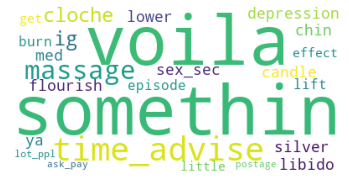

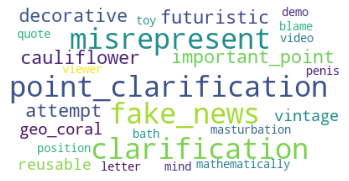

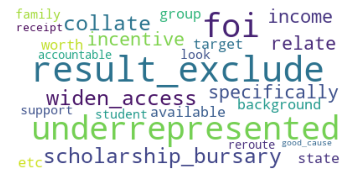

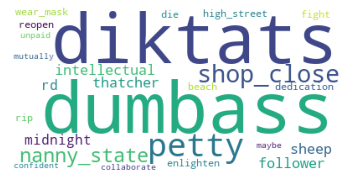

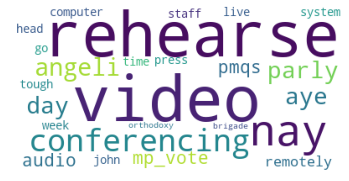

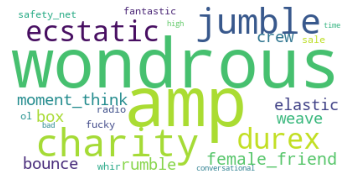

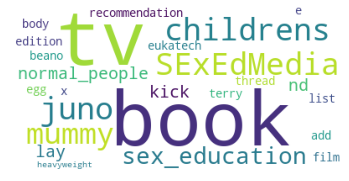

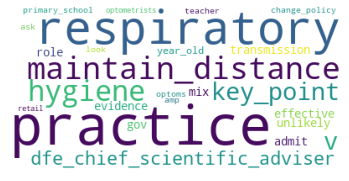

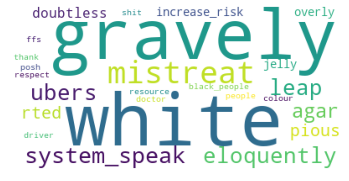

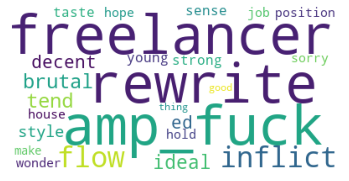

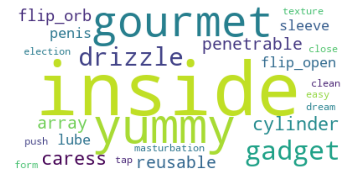

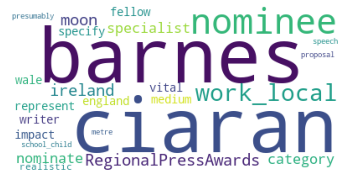

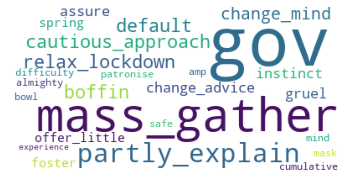

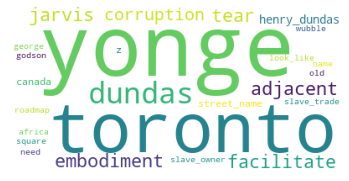

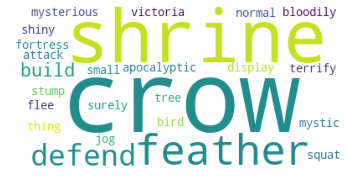

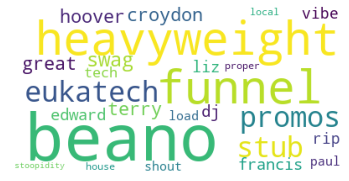

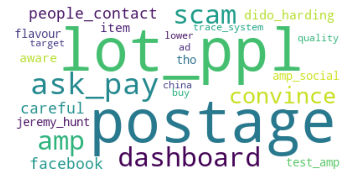

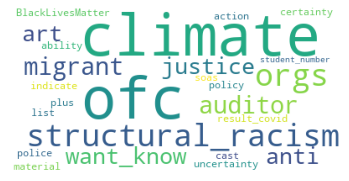

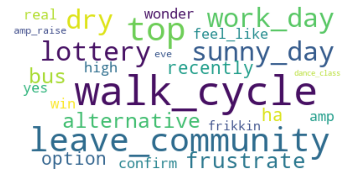

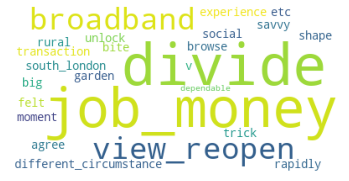

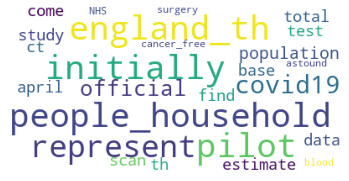

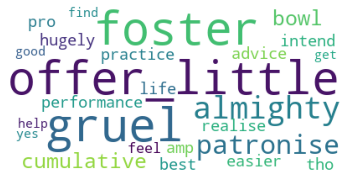

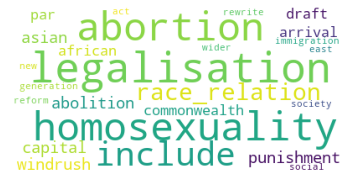

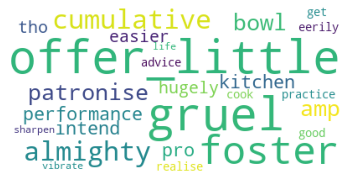

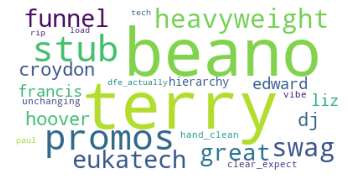

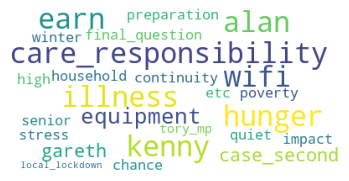

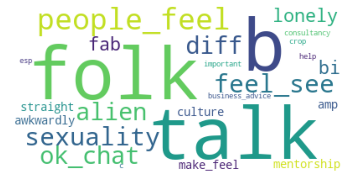

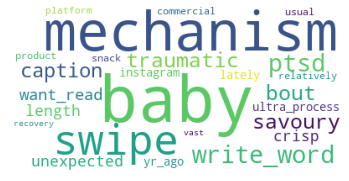

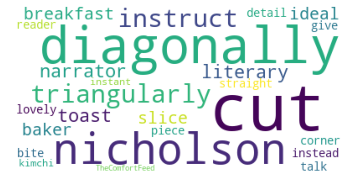

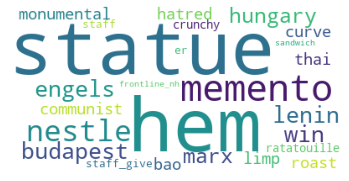

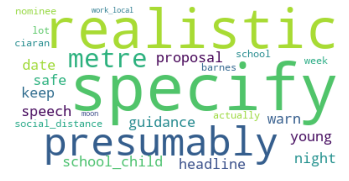

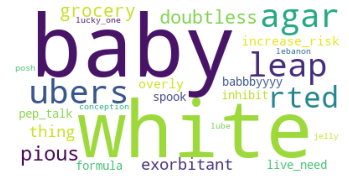

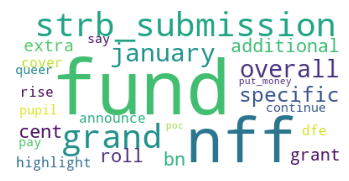

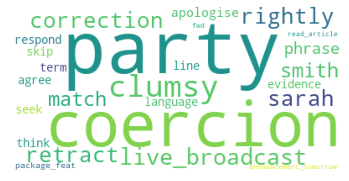

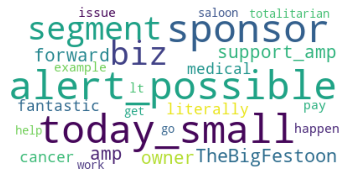

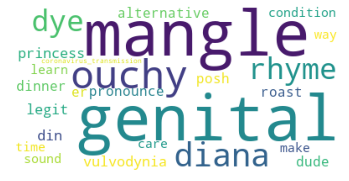

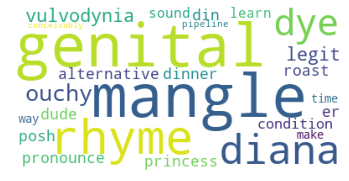

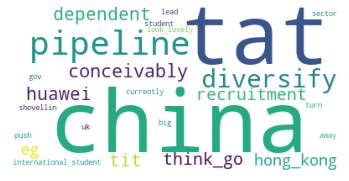

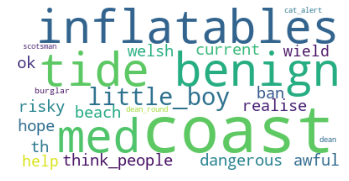

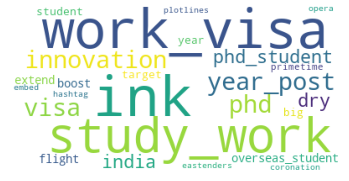

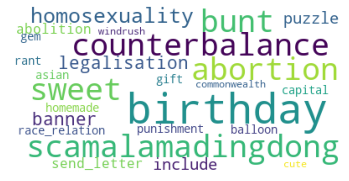

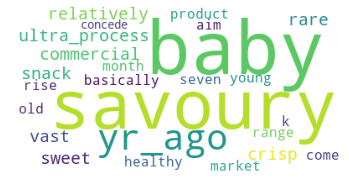

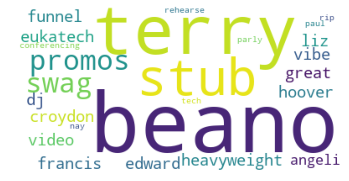

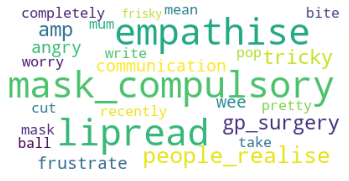

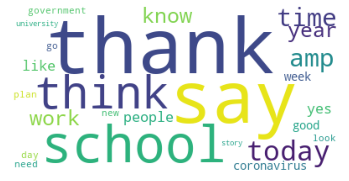

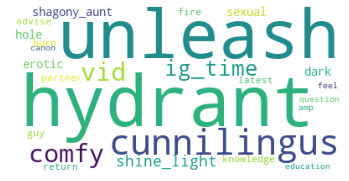

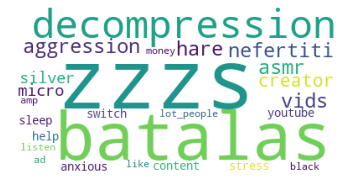

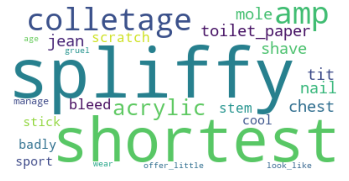

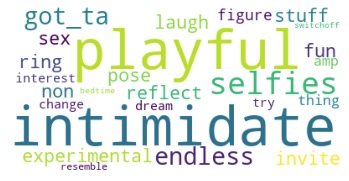

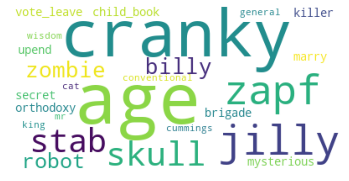

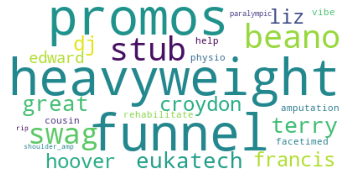

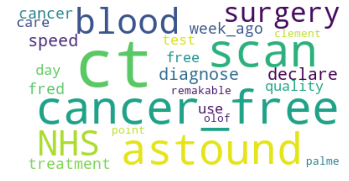

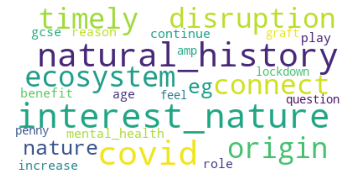

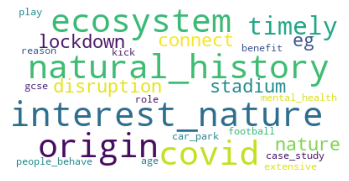

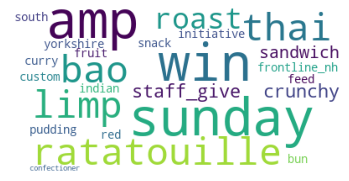

In [84]:
for i in range(len(df_words)):
    plot_topics(df_words['Word'][i], df_words['p'][i])

In [94]:
get_document_topics_unpacked= []
for row in get_document_topics: 
    temp = [[ i for i, j in row], [ j for i, j in row]]
    get_document_topics_unpacked.append(temp)

topics=[]
distribution=[]
for row in get_document_topics_unpacked:
    temp1 = row[0]
    temp2 = row[1]
    topics.append(temp1)
    distribution.append(temp2)

df['topics'] = topics
df['distribution'] = distribution


In [95]:
# convert list of tuples to dict for each element in series
df_topics_unpacked = pd.DataFrame(list(map(dict, df['topic_distribution']))).copy()
df = pd.concat([df, df_topics_unpacked], axis=1)

In [96]:
df = df.rename({0: 'topic_0', 1: 'topic_1', 2: 'topic_2', 3: 'topic_3', 4: 'topic_4', 5: 'topic_5', 
                6: 'topic_6', 7: 'topic_7', 8: 'topic_8', 9: 'topic_9', 10: 'topic_10',
               11: 'topic_11', 12: 'topic_12', 13: 'topic_13', 14: 'topic_14', 15: 'topic_15',
               16: 'topic_16', 17: 'topic_17', 18: 'topic_18', 19: 'topic_19', 20: 'topic_20',
               21: 'topic_21', 22: 'topic_22', 23: 'topic_23', 24: 'topic_24', 25: 'topic_25',
               26: 'topic_26', 27: 'topic_27', 28: 'topic_28', 29: 'topic_29', 30: 'topic_30',
               31: 'topic_31', 32: 'topic_32', 33: 'topic_33', 34: 'topic_34', 35: 'topic_35',
               36: 'topic_36', 37: 'topic_37', 38: 'topic_38', 39: 'topic_39', 40: 'topic_40',
               41: 'topic_41', 42: 'topic_42', 43: 'topic_43', 44: 'topic_44', 45: 'topic_45',
               46: 'topic_46', 47: 'topic_47', 48: 'topic_48', 49: 'topic_49', 50: 'topic_50',
               51: 'topic_51', 52: 'topic_52', 53: 'topic_53', 54: 'topic_54', 55: 'topic_55',               
               }, axis=1)

In [101]:
df['dominant_topic_value'] = df[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 
                'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
                'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15',
               'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20',
               'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25',
               'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30',
               'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35',
               'topic_36', 'topic_37', 'topic_38', 'topic_39', 'topic_40',
               'topic_41', 'topic_42', 'topic_43', 'topic_44', 'topic_45',
               'topic_46', 'topic_47', 'topic_48', 'topic_49', 'topic_50',
               'topic_51', 'topic_52', 'topic_53', 'topic_54']].max(axis=1)
df['dominant_topic'] = df[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 
               'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
               'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15',
               'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20',
               'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25',
               'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30',
               'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35',
               'topic_36', 'topic_37', 'topic_38', 'topic_39', 'topic_40',
               'topic_41', 'topic_42', 'topic_43', 'topic_44', 'topic_45',
               'topic_46', 'topic_47', 'topic_48', 'topic_49', 'topic_50',
               'topic_51', 'topic_52', 'topic_53', 'topic_54']].idxmax(axis=1)



In [116]:
df_dom_topic = df.sort_values(by=['dominant_topic','dominant_topic_value'], ascending=False).groupby('dominant_topic')
len(df_dom_topic)

2

In [118]:
df['dominant_topic'].nunique()

2

In [120]:
df_user = df.groupby('name').count()
df_user

Unnamed: 0  user_id  screen_name  location  \
name                                                            
Abbie Wightwick           716      716          716       716   
Alice Woolley             950      950          950       950   
Alison Kershaw             13       13           13        13   
Alix Fox 🦊                670      670          670       670   
Andrew Jack                87       87           87        87   
Ann Mroz                  561      561          561       561   
Bee Wilson                454      454          454         0   
Bethan Staton              67       67           67        67   
Camilla Turner            140      140          140       140   
Catriona Stewart          578      578          578       578   
Chris Gibson               14       14           14        14   
Chris Parr                382      382          382       382   
Eleanor Busby              26       26           26        26   
Ewan Petrie                97       97           97        97   
Freddie Whittaker         260      260          260       260   
Heather Sharp               2        2            2         2   
Jack Grove                193      193          193       193   
John Dickens              487      487          487       487   
Lauren Moss               167      167          167       167   
Liam Rice                  33       33           33        33   
Liz Shaw                   36       36           36        36   
Mark Johnson 章迈             6        6            6         6   
Mark McLaughlin           950      950          950       950   
Martha Fairlie              3        3            3         0   
Martin George             202      202          202       202   
MatthewReiszTHE           185      185          185       185   
Miranda Green            1058     1058         1058      1058   
Nicola Woolcock           294      294          294       294   
Paul Jump                  18       18           18        18   
Peter Bearne               59       59           59        59   
Richard Adams             324      324          324       324   
Rosemary Bennett          255      255          255       255   
Sanchia Berg              693      693          693       693   
Sarah Jewell                4        4            4         4   
Sean Coughlan             474      474          474       474   
Shane Mann                310      310          310       310   
Sian Griffiths            574      574          574       574   
Simon Baker                20       20           20        20   
Simon Jones               259      259          259       259   
Simone Rensch               3        3            3         3   
Tamara Cohen              236      236          236       236   
Will Hazell               571      571          571       571   
William Stewart           125      125          125       125   
annamckie                 128      128          128       128   
branwen jeffreys          223      223          223       223   
jamie mcivor               75       75           75        75   
suzi godson                87       87           87        87   

                   user_description  user_friends_n  user_followers_n  \
name                                                                    
Abbie Wightwick                 716             716               716   
Alice Woolley                   950             950               950   
Alison Kershaw                   13              13                13   
Alix Fox 🦊                      670             670               670   
Andrew Jack                      87              87                87   
Ann Mroz                        561             561               561   
Bee Wilson                      454             454               454   
Bethan Staton                    67              67                67   
Camilla Turner                  140             140               140   
Catriona Stewart              

In [121]:
df_per_user = df.groupby('name')['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 
                'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
                'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15',
                'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20',
                'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25',
                'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30',
                'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35',
                'topic_36', 'topic_37', 'topic_38', 'topic_39'].sum()

<ipython-input-121-c246625f1b89>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_per_user = df.groupby('name')['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',


In [122]:
df_per_user['total'] = df_per_user.sum(axis = 1)
df_per_user

topic_0   topic_1   topic_2   topic_3   topic_4   topic_5  \
name                                                                            
Abbie Wightwick    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Alice Woolley      2.163597  2.163597  2.163597  2.163597  2.163597  2.163597   
Alison Kershaw     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Alix Fox 🦊         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Andrew Jack        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Ann Mroz           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Bee Wilson         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Bethan Staton      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Camilla Turner     0.272714  0.272714  0.272714  0.272714  0.272714  0.272714   
Catriona Stewart   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Chris Gibson       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Chris Parr         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Eleanor Busby      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Ewan Petrie        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Freddie Whittaker  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Heather Sharp      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jack Grove         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
John Dickens       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Lauren Moss        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Liam Rice          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Liz Shaw           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Mark Johnson 章迈    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Mark McLaughlin    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Martha Fairlie     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Martin George      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MatthewReiszTHE    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Miranda Green      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Nicola Woolcock    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Paul Jump          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Peter Bearne       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Richard Adams      0.525766  0.525766  0.525766  0.525766  0.525766  0.525766   
Rosemary Bennett   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sanchia Berg       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sarah Jewell       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sean Coughlan      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Shane Mann         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Sian Griffiths     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Simon Baker        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Simon Jones        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Simone Rensch      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Tamara Cohen       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Will Hazell        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
William Stewart    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
annamckie          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
branwen jeffreys   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
jamie mcivor       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
suzi godson        0.327258  0.327258  0.327258  0.327258  0.327258  0.327258   

                    topic_6   topic_7   topic_8   

In [123]:
df_per_user2 = df_per_user[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 
                'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
                'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15',
                'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20',
                'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25',
                'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30',
                'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35',
                'topic_36', 'topic_37', 'topic_38', 'topic_39', 'total']].div(df_per_user.total, axis=0)
df_per_user3 = df_per_user2.copy()

In [124]:
df_per_user3.drop('total', axis=1, inplace=True)
df_per_user3

topic_0  topic_1  topic_2  topic_3  topic_4  topic_5  \
name                                                                      
Abbie Wightwick        NaN      NaN      NaN      NaN      NaN      NaN   
Alice Woolley        0.025    0.025    0.025    0.025    0.025    0.025   
Alison Kershaw         NaN      NaN      NaN      NaN      NaN      NaN   
Alix Fox 🦊             NaN      NaN      NaN      NaN      NaN      NaN   
Andrew Jack            NaN      NaN      NaN      NaN      NaN      NaN   
Ann Mroz               NaN      NaN      NaN      NaN      NaN      NaN   
Bee Wilson             NaN      NaN      NaN      NaN      NaN      NaN   
Bethan Staton          NaN      NaN      NaN      NaN      NaN      NaN   
Camilla Turner       0.025    0.025    0.025    0.025    0.025    0.025   
Catriona Stewart       NaN      NaN      NaN      NaN      NaN      NaN   
Chris Gibson           NaN      NaN      NaN      NaN      NaN      NaN   
Chris Parr             NaN      NaN      NaN      NaN      NaN      NaN   
Eleanor Busby          NaN      NaN      NaN      NaN      NaN      NaN   
Ewan Petrie            NaN      NaN      NaN      NaN      NaN      NaN   
Freddie Whittaker      NaN      NaN      NaN      NaN      NaN      NaN   
Heather Sharp          NaN      NaN      NaN      NaN      NaN      NaN   
Jack Grove             NaN      NaN      NaN      NaN      NaN      NaN   
John Dickens           NaN      NaN      NaN      NaN      NaN      NaN   
Lauren Moss            NaN      NaN      NaN      NaN      NaN      NaN   
Liam Rice              NaN      NaN      NaN      NaN      NaN      NaN   
Liz Shaw               NaN      NaN      NaN      NaN      NaN      NaN   
Mark Johnson 章迈        NaN      NaN      NaN      NaN      NaN      NaN   
Mark McLaughlin        NaN      NaN      NaN      NaN      NaN      NaN   
Martha Fairlie         NaN      NaN      NaN      NaN      NaN      NaN   
Martin George          NaN      NaN      NaN      NaN      NaN      NaN   
MatthewReiszTHE        NaN      NaN      NaN      NaN      NaN      NaN   
Miranda Green          NaN      NaN      NaN      NaN      NaN      NaN   
Nicola Woolcock        NaN      NaN      NaN      NaN      NaN      NaN   
Paul Jump              NaN      NaN      NaN      NaN      NaN      NaN   
Peter Bearne           NaN      NaN      NaN      NaN      NaN      NaN   
Richard Adams        0.025    0.025    0.025    0.025    0.025    0.025   
Rosemary Bennett       NaN      NaN      NaN      NaN      NaN      NaN   
Sanchia Berg           NaN      NaN      NaN      NaN      NaN      NaN   
Sarah Jewell           NaN      NaN      NaN      NaN      NaN      NaN   
Sean Coughlan          NaN      NaN      NaN      NaN      NaN      NaN   
Shane Mann             NaN      NaN      NaN      NaN      NaN      NaN   
Sian Griffiths         NaN      NaN      NaN      NaN      NaN      NaN   
Simon Baker            NaN      NaN      NaN      NaN      NaN      NaN   
Simon Jones            NaN      NaN      NaN      NaN      NaN      NaN   
Simone Rensch          NaN      NaN      NaN      NaN      NaN      NaN   
Tamara Cohen           NaN      NaN      NaN      NaN      NaN      NaN   
Will Hazell            NaN      NaN      NaN      NaN      NaN      NaN   
William Stewart        NaN      NaN      NaN      NaN      NaN      NaN   
annamckie              NaN      NaN      NaN      NaN      NaN      NaN   
branwen jeffreys       NaN      NaN      NaN      NaN      NaN      NaN   
jamie mcivor           NaN      NaN      NaN      NaN      NaN      NaN   
suzi godson          0.025    0.025    0.025    0.025    0.025    0.025   

                   topic_6  topic_7  topic_8  topic_9  ...  topic_30  \
name                                                   ...             
Abbie Wightwick        NaN      NaN      NaN      NaN  ...       NaN   
Alice Woolley        0.025    0.025    0.025    0.025  ...     0.025   
Alison Kershaw         NaN      NaN      NaN      NaN  

TypeError: bar() missing 1 required positional argument: 'height'

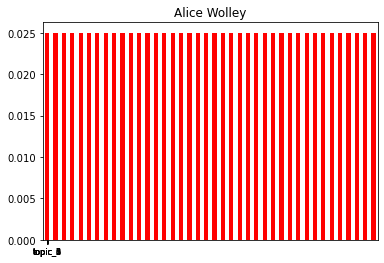

In [126]:
x = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
labels = list(df_per_user3.columns)
row1 = df_per_user3.iloc[1]
row1.plot(kind='bar',title='Alice Wolley', color='r',stacked=False)
#row2 = df.iloc[7]
#row2.plot(kind='bar',title='Binned comparison', color='k',stacked=False)
plt.xticks(x,labels, rotation='horizontal',fontsize=8)
plt.bar(df_per_user3.iloc[[1]])


In [143]:
#df = df.drop('text', axis = 1)
#df = df.drop('clean_tweet', axis = 1)
df.drop('bigrams',axis=1,inplace=True)
df.drop('Unnamed: 0', axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('hour',axis=1,inplace=True)
df.drop('minute',axis=1,inplace=True)
df.drop('second',axis=1,inplace=True)
df.drop('normalized_tweet',axis=1,inplace=True)
df.drop('tokenized_tweet',axis=1,inplace=True)
df.drop('ngram',axis=1,inplace=True)
df.drop('tweet&hashtag',axis=1,inplace=True)
df.drop('quote_screen_name',axis=1,inplace=True)
df.drop('quote_text',axis=1,inplace=True)
df.drop('source_device',axis=1,inplace=True)
df.drop('is_quote_status',axis=1,inplace=True)
df.drop('in_reply_to_screen_name',axis=1,inplace=True)
df.drop('in_reply_to_user_id',axis=1,inplace=True)
df.drop('contributors_enabled',axis=1,inplace=True)
df.drop('listed_count',axis=1,inplace=True)
df.drop('truncated',axis=1,inplace=True)
df.drop('display_text_range',axis=1,inplace=True)
df.drop('source',axis=1,inplace=True)
df.drop('source_url',axis=1,inplace=True)
df.drop('retweet_text', axis=1,inplace=True)


KeyError: "['bigrams'] not found in axis"

In [144]:
df.to_csv('edu_tweets_modelled.csv', index=False)